# Plotting results

#### Jukes Liu. Last modified 10-27-2019.

In [123]:
import numpy as np
# import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
import cv2
import pandas as pd    
# from time import sleep
# from IPython.display import clear_output
# import scipy.stats
import datetime
# import shutil

csvpaths = '/home/jukes/Documents/Sample_glaciers/'
basepath = '/media/jukes/jukes1/LS8aws/'
massorsize = "mass"
# BoxIDs = ['120', '174', '277', '194', '191', '193']
BoxIDs = ['001', '004', '033', '277']
dfs = []

### Load in csv files with terminus position and change rates for the glaciers

In [124]:
for BoxID in BoxIDs:
    df = pd.read_csv(csvpaths+'Tpos_Box'+BoxID+'_flowline50_filtered.csv', sep=',', dtype=str, header=0)
    print(df.shape)
    dfs.append(df)

(87, 10)
(68, 10)
(87, 10)
(64, 10)


In [173]:
# dfs[3] = dfs[3][dfs[3]['tpos'] > -300.0]

### Convert all dates to datetime objects and all terminus positions and changerates to floats

In [125]:
#maximum terminus position for the glaciers
# max_pos = {'120' : 630.0, '174' : 772.5, '277': 832.5, '194': 650.0, '191': 997.7537271290947 ,'193': 518.5878613317011}
max_pos = {'001': 650.0, '033': 660.0, '277': 720.0, '004': 2500.0}

In [171]:
#Turn datetimes from datetime_df into DateTime objects
#grab the datetime strings
for df in dfs:
    datetimes = list(df['datetimes'])
    term_positions = list(df['tpos'])
    changerates = list(df['changerate'])
    BoxID = list(df['BoxID'])[0]
    print(BoxID)
    
    max_position = max_pos[BoxID]
     
    #create list to store the new data
    datetime_objs = []
    tpositions = []
    changes = []

    for date in datetimes:
        date = str(date)
        datetime_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
        datetime_obj = np.datetime64(datetime_obj)
        datetime_objs.append(datetime_obj)
    
    for tpos in term_positions:
        tpos = float(tpos)
        tpos = tpos - max_position
        tpositions.append(tpos)
        
    for crate in changerates:
        crate = float(crate)
        changes.append(crate)

    #add the datetime objects back into the datetime column
    df['datetimes'] = datetime_objs
    df['tpos'] = tpositions
    df['changerate'] = changes

001


ValueError: unconverted data remains:  00:00:00

## Plot:

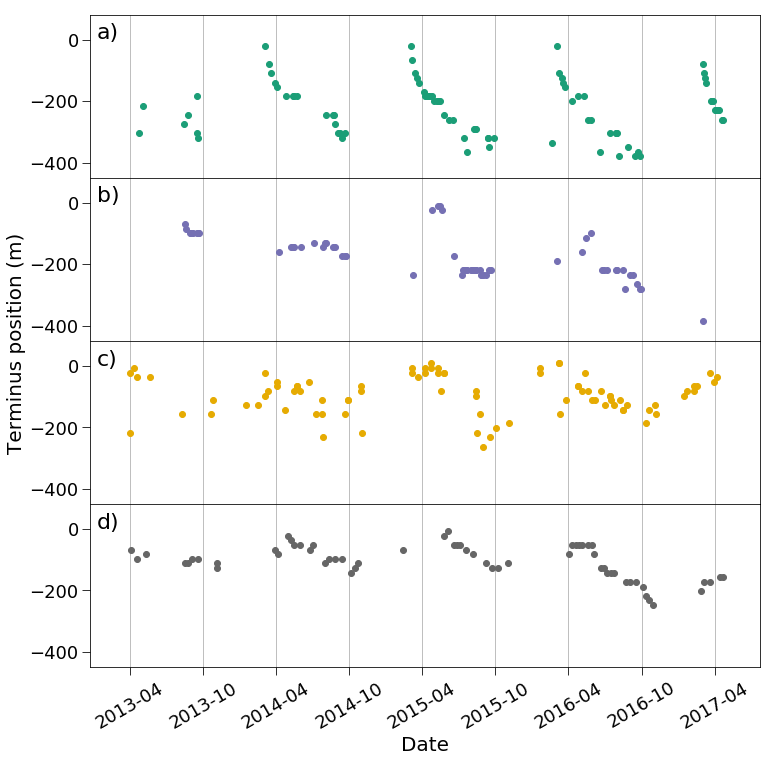

In [241]:
nplots = len(BoxIDs) # set number of subplots
colors = pl.cm.Dark2(np.linspace(0,1, nplots)) # generate colors using the plasma colormap
panels = ['a)', 'b)', 'c)', 'd)']
# ylims_bottom = [-450, -450, -450, -450] # set different y limits for each plot

fig, axs = plt.subplots(nplots, 1, sharex=True, figsize=(12,12))
fig.subplots_adjust(hspace=0) # Remove horizontal space between axes

for i in range(0, nplots):
    ax = axs[i]; df = dfs[i]; col = colors[i]; BoxID = BoxIDs[i] # grab repeated values   
    ax.plot(df['datetimes'], df['tpos'], color=col, marker='o', markersize=6, linewidth=0) # plot
    ax.set_ylim(-450, 80) # y limits
    ax.set_xlim(datetime.date(2013, 1, 1), datetime.date(2017, 8, 1))
#     ax.set_ylabel('Box'+BoxID, fontsize=14, color='k') # y-axis label for subplot
    ax.tick_params(direction='out', colors='k', size=8, labelsize=18) # tick parameters
    ax.tick_params(axis='x', labelrotation=30, labelsize=18) # rotate xticks

    #set date labels and spacing:
    ax.set_xticks([datetime.date(2013, 4, 10), datetime.date(2013, 10, 10), 
                    datetime.date(2014, 4, 10), datetime.date(2014, 10, 10),
                    datetime.date(2015, 4, 10), datetime.date(2015, 10, 10),
                   datetime.date(2016, 4, 10), datetime.date(2016, 10, 10),
                   datetime.date(2017, 4, 10)])
    ax.set_xticklabels(['2013-04', '2013-10', 
                        '2014-04', '2014-10',
                        '2015-04', '2015-10',
                        '2016-04', '2016-10',
                        '2017-04', '2017-10',])
    ax.grid(axis='x') # turn on grid lines
    
    ax.text(0.01, 0.95, panels[i], fontsize=22, transform=ax.transAxes, verticalalignment='top',
           fontdict={'weight': 'normal'}) # panel labels (a, b, c, d)
    
#Set common x label
for ax in axs:
    ax.set_xlabel('Date', fontsize=20)
#Set common y label
fig.text(0.04, 0.5, 'Terminus position (m)', va='center', ha='center', rotation='vertical', fontsize=20)

# #Save figure
plt.savefig(csvpaths+"/Figures/Tpos_timeseries_"+str(datetime. datetime. today())[:-16]+".png", dpi=500, bbox_inches='tight')

plt.show()

In [103]:
# df3.sort_values(by='term_position', ascending=False)